**Easy:**
1. How many unique customers are in the dataset?

In [73]:
import pandas as pd
df =  pd.read_json('dim_customer.json')

print(f"ANSWER: There are {len(df)} unique customers in the dataset.")

ANSWER: There are 5191 unique customers in the dataset.


2. What are the different categories of products available? How many unique categories are there?

In [74]:
import pandas as pd
df = pd.read_csv('fct_invoice.csv')
product_categories = []

for product_type in df['category']:
    if product_type not in product_categories:
        product_categories.append(product_type)
        
print(f"ANSWER: The different categories of products available are as follows:\n{product_categories}\nThere are {len(product_categories)} unique categories.")

ANSWER: The different categories of products available are as follows:
['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
There are 8 unique categories.


3. Which payment method is the most popular? How many times was it used?

In [1]:
import pandas as pd
df = pd.read_csv('fct_invoice.csv')

def most_popular_payment_method(df):
    valuecount = df['payment_method'].value_counts()
    most_popular = valuecount.idxmax()
    count = valuecount.max()
    return most_popular, count
    
payment_method, count = most_popular_payment_method(df)
print(f"ANSWER: The most popular payment method is {payment_method}, and it was used {count} times.")

ANSWER: The most popular payment method is Cash, and it was used 44447 times.


**Medium:**
1. What are the three most popular categories, by total sales?

In [61]:
import pandas as pd
df = pd.read_csv('fct_invoice.csv')
product_categories = []
categories_by_sales = {}
df['sales'] = df['quantity'] * df['price']

df = (
    df.groupby("category", as_index=False)["sales"]
    .sum()
    .sort_values("sales", ascending=False)
)

top3 = df.head(3)
categories = ", ".join(top3["category"])
values = ", ".join(f"{value:.2f}" for value in top3["sales"])

print(f"ANSWER: The three most popular categories are {categories}, with their total sales being {values} respectively.")

ANSWER: The three most popular categories are Clothing, Shoes, Technology, with their total sales being 113996791.04, 66553451.47, 57862350.00 respectively.


2. What are the total sales attributed to customers over the age of 45?

In [62]:
import pandas as pd
df = pd.read_csv('fct_invoice.csv')
df2 = pd.read_json('dim_customer.json')
customers_over45 = df2[df2['age'] > 45]

mergeddf = df.merge(customers_over45, left_on="customer_id", right_on="id", how="inner")

mergeddf['sales'] = mergeddf['quantity'] * mergeddf['price']
total_sales = mergeddf['sales'].sum()

print(f"ANSWER: {total_sales} in total sales are attributed to customers over the age of 45.")

ANSWER: 82039768.15 in total sales are attributed to customers over the age of 45.


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

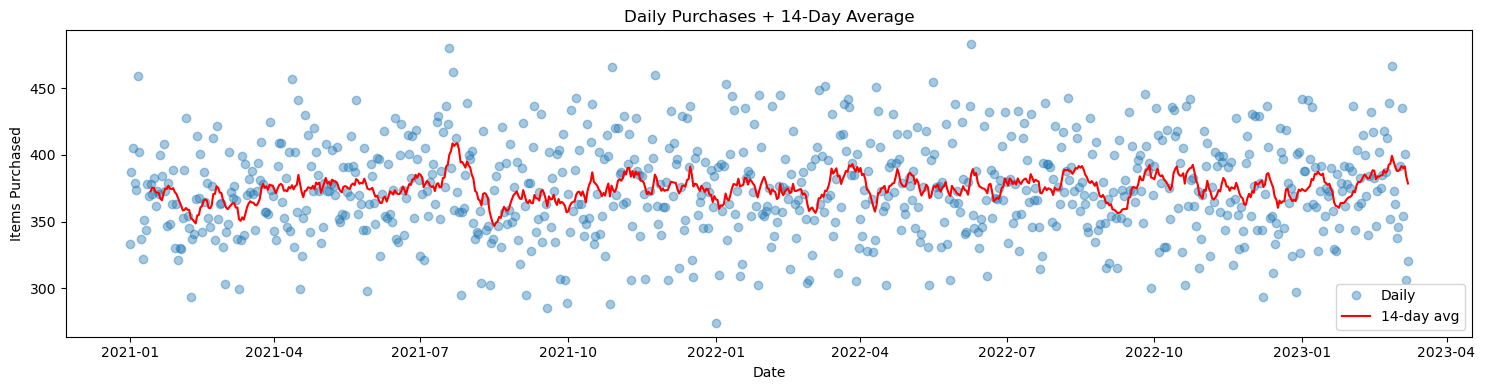

ANSWER: Across different invoice dates, the quantity of items purchased tends to hover around the 375 mark.
Based on the data, purchases increase during the summer, then lower in the autumn months before rising again in the winter, right before Christmas.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fct_invoice.csv')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

df['date'] = df['invoice_date'].dt.date
invoice_dates = df.groupby('date')['quantity'].sum().sort_index()

s = invoice_dates.copy()
s.index = pd.to_datetime(s.index)

plt.figure(figsize=(15,4))
plt.plot(s.index, s.values, linestyle='none', marker='o', alpha=0.4, label='Daily')
plt.plot(s.index, s.rolling(14).mean(), color='red', label='14-day avg')
plt.ylabel("Items Purchased")
plt.xlabel("Date")
plt.title("Daily Purchases + 14-Day Average")
plt.legend()
plt.tight_layout()
plt.show()

print("ANSWER: Across different invoice dates, the quantity of items purchased tends to hover around the 375 mark.\nBased on the data, purchases increase during the summer, then lower in the autumn months before rising again in the winter, right before Christmas.")

**Hard:**
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [41]:
import pandas as pd

df = pd.read_csv('fct_invoice.csv')
df2 = pd.read_json('dim_customer.json')
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"]
mergeddf = pd.merge(df, df2, left_on="customer_id", right_on="id", how="inner")
mergeddf["age_range"] = pd.cut(mergeddf["age"], bins=bins, labels=labels, right=False, include_lowest=True)
mergeddf["sales"] = mergeddf["quantity"] * mergeddf["price"]
                                            
pivot = pd.pivot_table(
    mergeddf,
    index="category",
    columns="age_range",
    values="sales",
    aggfunc="sum",
    observed=True
)

pivot

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
